In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json

In [39]:
csv_path = "Health_Factors.csv"
HF_df = pd.read_csv(csv_path)

HF_df.head(5)

,State,FIPS,County,Population,Life Expectancy,# Food Insecure,Median Household Income,# Primary Care Physicians,# Unemployed,# Completed High School
0,Alabama,1089,Madison,372909,77.702932,48620,68609,326.0,4714,227198
1,Alabama,1091,Marengo,18863,72.314521,3920,38838,9.0,271,10974
2,Alabama,1085,Lowndes,9726,71.150811,2400,33930,1.0,204,5533
3,Alabama,1087,Macon,18068,72.837683,3850,34281,7.0,337,9843
4,Alabama,1097,Mobile,413210,75.234643,69830,49492,274.0,7024,241102


In [3]:
#Review Data
HF_df.count()

State                        1422
FIPS                         1422
County                       1358
Population                   1422
Life Expectancy              1403
# Food Insecure              1422
Median Household Income      1422
# Primary Care Physicians    1355
# Unemployed                 1422
# Completed High School      1422
dtype: int64

In [4]:
#Remove N/A's from DF
clean_HF_df = HF_df.dropna(how="any")
clean_HF_df.count()

State                        1273
FIPS                         1273
County                       1273
Population                   1273
Life Expectancy              1273
# Food Insecure              1273
Median Household Income      1273
# Primary Care Physicians    1273
# Unemployed                 1273
# Completed High School      1273
dtype: int64

In [5]:
#Filter on Texas

Texas_HF = clean_HF_df.loc[clean_HF_df["State"] == "Texas"]
                           
Texas_HF.head()
            
                           

,State,FIPS,County,Population,Life Expectancy,# Food Insecure,Median Household Income,# Primary Care Physicians,# Unemployed,# Completed High School
980,Texas,48339,Montgomery,607391,79.666573,69390,88833,353.0,9659,327594
981,Texas,48337,Montague,19818,74.436613,3190,53649,6.0,265,11685
982,Texas,48335,Mitchell,8545,75.727868,1130,44457,4.0,82,4385
983,Texas,48341,Moore,20940,77.756567,2740,55099,10.0,255,8393
984,Texas,48347,Nacogdoches,65204,76.982722,12430,46207,46.0,1057,31213


In [6]:
#Calculate Percentage Columns

Final_DF = pd.DataFrame(Texas_HF)
Final_DF["% Food Insecure"] = Texas_HF["# Food Insecure"]/Texas_HF["Population"]
Final_DF["% Primary Care Physicians"] = Texas_HF["# Primary Care Physicians"]/Texas_HF["Population"]
Final_DF["% Unemployed"] = Texas_HF["# Unemployed"]/Texas_HF["Population"]
Final_DF["% Completed High School"] = Texas_HF["# Completed High School"]/Texas_HF["Population"]

Final_DF.head()

,State,FIPS,County,Population,Life Expectancy,# Food Insecure,Median Household Income,# Primary Care Physicians,# Unemployed,# Completed High School,% Food Insecure,% Primary Care Physicians,% Unemployed,% Completed High School
980,Texas,48339,Montgomery,607391,79.666573,69390,88833,353.0,9659,327594,0.114243,0.000581,0.015902,0.539346
981,Texas,48337,Montague,19818,74.436613,3190,53649,6.0,265,11685,0.160965,0.000303,0.013372,0.589616
982,Texas,48335,Mitchell,8545,75.727868,1130,44457,4.0,82,4385,0.132241,0.000468,0.009596,0.513166
983,Texas,48341,Moore,20940,77.756567,2740,55099,10.0,255,8393,0.130850,0.000478,0.012178,0.400812
984,Texas,48347,Nacogdoches,65204,76.982722,12430,46207,46.0,1057,31213,0.190632,0.000705,0.016211,0.478698


In [93]:
filters_df = Final_DF.loc[Final_DF['Population'] > 10000]
top5_DF = filters_df.nlargest(5, ['Life Expectancy'])
top5_DF.head()


,State,FIPS,County,Population,Life Expectancy,# Food Insecure,Median Household Income,# Primary Care Physicians,# Unemployed,# Completed High School,% Food Insecure,% Primary Care Physicians,% Unemployed,% Completed High School
1207,Texas,48157,Fort Bend,811688,83.016215,81310,101361,677.0,13622,444200,0.100174,0.000834,0.016782,0.547255
1107,Texas,48085,Collin,1034730,82.675870,105240,96847,1019.0,17358,598877,0.101708,0.000985,0.016775,0.578776
1072,Texas,48491,Williamson,590551,82.106826,58830,92661,396.0,8772,337578,0.099619,0.000671,0.014854,0.571632
1129,Texas,48121,Denton,887207,82.014735,92570,90910,464.0,14619,506374,0.104339,0.000523,0.016478,0.570751
1055,Texas,48453,Travis,1273954,81.914037,155240,80690,1078.0,19047,753099,0.121857,0.000846,0.014951,0.591151


In [126]:
# Set params that will be updated with each county iteration
top5_response = []
top5_websources = []
county = []
cases = []
deaths = []
vaccinated = []
fips = []
# Loop through top 5 data frame to retrieve FIPS
for fip in top5_DF["FIPS"]:
    fips.append(fip)
fips

[48157, 48085, 48491, 48121, 48453]

In [127]:
# Import secret key
#from config import cKey
#actnowurl = f"https://api.covidactnow.org/v2/county/{fip}.json?apiKey={cKey}"
# Loop trough top 5 FIPS list
for fip in fips:
    # Make a request for each of the FIPS
    top5_response = requests.get(f"https://api.covidactnow.org/v2/county/{fip}.json?apiKey=f6c6f78fa50f432b8868ec24d869a4ef").json()
    # Append the url to the websources list
    top5_websources.append(top5_response["url"])
    # Append the Covid-19 statistics
    county.append(top5_response["county"])
    cases.append(top5_response["actuals"]["cases"])
    deaths.append(top5_response["actuals"]["deaths"])
    vaccinated.append(top5_response["metrics"]["vaccinationsInitiatedRatio"])
print(json.dumps(top5_response, indent=4, sort_keys=True))

{
    "actuals": {
        "cases": 119391,
        "contactTracers": null,
        "deaths": 1426,
        "hospitalBeds": {
            "capacity": 2262,
            "currentUsageCovid": 138,
            "currentUsageTotal": 1966
        },
        "icuBeds": {
            "capacity": 280,
            "currentUsageCovid": 63,
            "currentUsageTotal": 244
        },
        "negativeTests": null,
        "newCases": 171,
        "newDeaths": 7,
        "positiveTests": null,
        "vaccinationsCompleted": 793992,
        "vaccinationsInitiated": 899060,
        "vaccinationsInitiatedDemographics": {
            "age": {
                "12-15": 46453,
                "16-49": 556911,
                "50-64": 174812,
                "65-79": 97945,
                "80_plus": 22450,
                "unknown": 489
            },
            "ethnicity": null,
            "race": {
                "asian": 61778,
                "black": 36736,
                "other": 169246,
 

In [149]:
# Create Data Frame to store Covid-19 Data
covidActNow_df = pd.DataFrame(county, columns = ['County'])
covidActNow_df["Cases"] = cases
covidActNow_df["Deaths"] = deaths
covidActNow_df[" % Vaccinated"] = vaccinated
covidActNow_df[" % Vaccinated"] = covidActNow_df[" % Vaccinated"].astype(float).map("{:.1%}".format)
#index = county
covidActNow_df = covidActNow_df.set_index('County')
# View Covid Statistics Data Frame
covidActNow_df.head()

,Cases,Deaths,% Vaccinated
County,,,
Fort Bend County,99945,965,70.7%
Collin County,126914,1119,66.9%
Williamson County,76254,701,66.8%
Denton County,107337,1005,61.2%
Travis County,119391,1426,70.6%


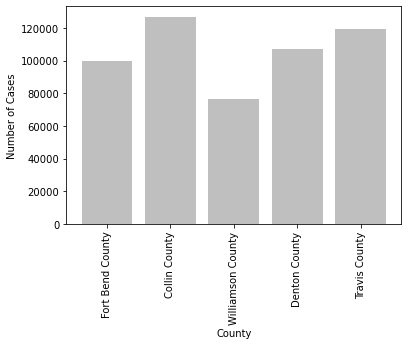

In [183]:
cases_plot = plt.bar(county, cases, color='k', alpha= 0.25, align="center")
cases_plot = plt.xlabel("County")
cases_plot = plt.ylabel("Number of Cases")
cases_plot = plt.xticks(rotation = 90)
plt.show(cases_plot)

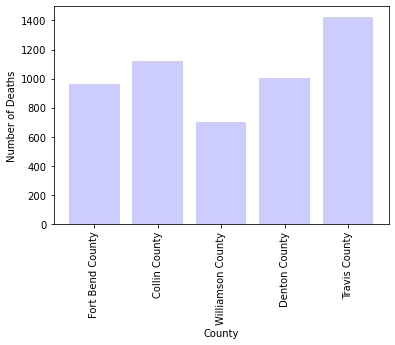

In [165]:
deaths_plot = plt.bar(county, deaths, color='b', alpha= 0.20, align="center")
deaths_plot = plt.xlabel("County")
deaths_plot = plt.ylabel("Number of Deaths")
deaths_plot = plt.xticks(rotation = 90)
plt.show(deaths_plot)

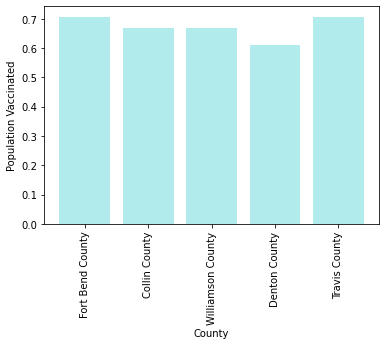

In [178]:
vaccinated_plot = plt.bar(county, vaccinated, color='c', alpha= 0.30, align="center")
vaccinated_plot = plt.xlabel("County")
vaccinated_plot = plt.ylabel("Population Vaccinated")
vaccinated_plot = plt.xticks(rotation = 90)
plt.show(vaccinated)

In [117]:
# Retrieve websources
print(top5_websources)
# View Websources
import webbrowser
new = 2
for web in top5_websources:
    webbrowser.open(web, new=new)
print("View Covid Act Now Data on The Web!")

['https://covidactnow.org/us/texas-tx/county/fort_bend_county', 'https://covidactnow.org/us/texas-tx/county/collin_county', 'https://covidactnow.org/us/texas-tx/county/williamson_county', 'https://covidactnow.org/us/texas-tx/county/denton_county', 'https://covidactnow.org/us/texas-tx/county/travis_county']
View Covid Act Now Data on The Web!
